# Introduction

Welcome to the ninth lab. Time to start with the famed neural networks. Everything should be fine until you hit the backpropagation algorithm. There are dozens of versions and implementations online, none are simple or straightforward, but in the lecture I tried an explanation that keeps the complexity to a minimum. It may be confusing to find which part does what and how to implement it, so I added a few tips that I hope will limit your debugging time. Enjoy!

# 1. Fundamentals

#### 1.1 **[1pt]** Describe a real (human) neuron. Use the words "dendrite", "axon", "synapses" and "spike".

A reuron is a specialized type of cell of the nervous system. Its peculiarity is in forming large networks of similar cells, connected by touch (synapses), and communicating with each other using electric signals. It does so by (i) receiving electric impulses (spikes) from other neurons through its dendrites. (ii) if the total potential received over a certain amount of time is above a threshold, then (iii) a spike is sent through its axon (a sort of elongated output connection) to all cells it is connected to.

#### 1.2 **[1pt]** Describe the logistic function (in English). Include/utilize the concept of "saturation".

The logistic function $\sigma$ is a sigmoid function (meaning shaped like an S) typically employed to model the non-linearity of neurons. It's defined over the whole R in input, but its output is bounded in the open interval (0,1). Its inflection point is at (0,0.5) meaning that depending the sign of the input, it will output a value either above or below 0.5. It's approximately linear around the inflection point, but then curves nonlinearly to respect its boundary. This implies that the output for two near, high-valued inputs will be basically indistinguishable: both $\sigma(10^{10})$ and $\sigma(10^{10}+1)$ will return the same value of 1, with indistinguishable variations.

#### 1.3 **[1pt]** Explain the relationship between the human brain, neural networks, and perceptrons (in English).

Neural networks were initially derived to describe the human brain, as networks of artificial neurons. These artificial neurons were mathematical models of extreme simplifications on the structure of human neurons. The resulting model however is typically better understood as a generic function approximator with a formula (and corresponding behavior) more similar to an extended Perceptron. This can be found both in its use of parametrization (linear combination of weights and inputs) and in its main learning algorithm Backpropagation (iteratively update the weights in the direction of diminishing errors).

#### 1.4 **[2pt]** Write the full equation for a network with structure [2, 4, 1], specifying the value of the final activation `act`. How many weights does this network have?

- This means two inputs, one hidden layer of four neurons, and one neuron in the output layer.
- You can provide either the linear algebra equation (still, define any vector or matrix you use) or the fully-expanded version (as `act` in the slides).
- Feel free to ignore the bias connection for now.
- To define multiple equations on individual lines: use the double dollar sign environment, then `\\` to go to a new line (see source of this cell: `$$ eq_1=0 \\ eq_2=1 $$` => $$ eq_1=0 \\ eq_2=1 $$
- To draw nice matrices: wrap the elements in a `pmatrix` environment, then use `&` to tabulate to the next column and `\\` to go to the next row (see source of this cell):
$$
\begin{pmatrix}
A & B \\ C & D
\end{pmatrix}
$$

### Linear Algebra version:


$X = 
$$
\begin {pmatrix}
x_1 \\ x_2
\end{pmatrix}
$$ 
$

$W_{in} =
$$
\begin{pmatrix}
w_1 & w_2 \\
w_3 & w_4 \\
w_5 & w_6 \\ 
w_7 & w_8 \\
\end{pmatrix}
$$
$

$n_{hid} = 
$$
\begin {pmatrix}
n_1 \\ n_2 \\n_3 \\n_4
\end{pmatrix}
$$
$

$W_{hid} =
$$
\begin{pmatrix}
w_9 & w_{10} & w_{11} & w_{12}
\end{pmatrix}
$$
$

$act= n_{out}=\sigma[W_{hid}n_{hid}]=\sigma[W_{hid} \sigma(W_{in}X)]$

### Expanded definition using neuron names:
$n_{hid}= \sigma(W_{in}X)$ where

$n_1 = \sigma(w_1 x_1 + w_2 x_2)$ 

$n_2= \sigma(w_3 x_1 + w_4 x_2)$     

$n_3 = \sigma(w_5 x_1 + w_6 x_2)$      

$n_4 = \sigma(w_7 x_1 + x_8 x_2)$

### Fully expanded equation:

$act = n_{out} = \large\sigma[w_9 \sigma(w_1 x_1 + w_2 x_2) + w_{10} \sigma(w_3 x_1 + w_4 x_2) + w_{11} \sigma(w_5 x_1 + w_6 x_2) + w_{12} \sigma(w_7 x_1 + w_8 x_2)]$

#### 1.5 **[2pt]** The network parametrization only defines an _upper bound_ for the network's functional complexity: explain what does this mean (in English). Then also answer: would an overly large network work for a simple problem? Would an overly small network work for a complex problem?

A neural network with fixed structure and activation defines a subspace of all possible functions. $\mathcal{C(K)}$ These range in complexity **from the simplest functions (constant)** to an **upper bound defined by the network structure and activation**. In principle, the larger the structure (more complex the activation), the higher this upperbound can go. Even the most complex, largest of network though, can be used to define constant functions. By simply setting the weight matrix of the output layer to 0, we force the network output $(n_{out})$ to correspond to a vector of constant numbers that do not depend on the inputs, but only the value of the activation function on 0.

- An overly large network should in principle work for a simpler problem. Though beware as larger structure means larger function subspace, which may be harder or take longer to explore (higher sensitivity to initialization)
- An overly small network would in principle "work" for a complex problem, in the sense that if the number of inputs and outputs match then the function can be applied. At the same time, small networks are inherently incapable of approximating higher complexity functions to arbitrary precision, so in that sense the answer is "No".

#### 1.6 **[1pt]** Explain the implications of the Universal Approximation theorem (in English).

The fundamental implication of the Universal Approximation theorem is that any function can be in principle be approximated by a neural network of sufficient size.

# 2. Multilayer feed-forward neural networks

As is customary, in this section you get to code neural networks by hand. There are many possible implementation; we will focus on a toy version without parallelism or GPUs, but employing Numpy and linear algebra.

#### 2.1 **[2pt]** Fix the implementation of a simple neural network below (missing parts are denoted by `?`). Print the activation for a network with logistic transfer, structure [4,3,4,3], random weights, and input [2,1,2,1].

- If this is the first Python class you see, worry not: it's just a way to keep code and data together
- For now remember only to place `self` as first argument of all methods, and to call class methods as `self.method_name()`
- We will not implement the bias at this round; careful though, begin thinking about what would change, because we will introduce it next week.
- Remember that a weight matrix corresponds to one layer of neurons: the rows correspond to the incoming connections to each neuron (so as many rows as neurons), the columns to incoming inputs that are connected to each of the neurons (so one column per input)
- So, if the structure was for example [2,3,1], then the first matrix would be between a layer of size 2 (inputs) and a layer of size 3: 3 neurons with 2 inputs each, so a weight matrix of size (3,2). The second weight matrix would have size (1,3).
- When testing, remember to pass numpy arrays as inputs! Not Python lists!
- The method `__init__()` is one of the pre-determined methods for object oriented programming in Python. It is called automatically after memory allocation upon construction of an object of the class, and is meant as an "initializer" the part of a constructor that sets the variables and gets the object in a ready-to-compute state.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(8,6)}, style='whitegrid')

In [2]:
class FeedForwardNeuralNetwork:
    def __init__(self, struct):
        # The structure of the network is a list of (inputs and) layers sizes
        self.struct = struct
        self.nlayers = len(self.struct)
        # You can deconstruct the list using our old acquaintance the splat
        self.nins, *self.nhids, self.nouts = self.struct
        # IMPORTANT: state is a list of layer outputs, filled by the forward pass
        # IMPORTANT: state[0] contains the inputs, state[1] will contain the output
        # of the first layer of neurons, corresponding to struct[1]
        self.state = [np.empty(lsize, dtype='float64') for lsize in self.struct]
        # We also need to compute the size of the weight matrices
        self.wsizes = [[self.struct[i+1], self.struct[i]] for i in range(len(self.struct)-1)]
        # IMPORTANT: weights is a list of weight matrices per each layer of neurons
        # IMPORTANT: weights[0] will hold the weights entering the first layer, which
        # corresponds to the neurons of struct[1], and will be used to compute state[1]
        self.weights = [np.random.normal(size=ws) for ws in self.wsizes]
        # Finally our activation function, the humble (logistic) sigmoid
        self.sigma = lambda x: 1/(1-np.exp(-x)) # we could have used a `def` here

    
    # To activate a layer: activate the linear combination of weights and inputs 
    def act_layer(self, nlay):
        return self.sigma(self.weights[nlay].dot(self.state[nlay]))

    # To activate a network, activate each layer in turn, saving the activation in
    # the network state, finally return the output of the last layer
    def act_net(self, inp):
        assert len(inp) == self.nins, f"got input `{inp}`, expected np.array of length `{self.nins}`"
        self.state[0] = inp
        for nlay in range(self.nlayers-1):
            self.state[nlay+1] = self.act_layer(nlay)
        return self.state[-1]   #return the last state (or activation of previous layer)

In [3]:
# Use this test to ensure your code works correctly
struct = [4,3,4,3]
inputs = [2,1,2,1]
net = FeedForwardNeuralNetwork(struct)
print("activation:", net.act_net(np.array(inputs)))

activation: [ 1.12491012  1.00000047 -0.0031797 ]


#### 2.2 **[5pt]** Fix the implementation of Backpropagation below (missing parts are denoted by ?). Then (i) instantiate a new network with the same structure as before, (ii) activate it on dataset provided and compute the Risk based on Mean Squared Error, (iii) run the Backpropagation algorithm for 10000 epochs, (iv) compute the Risk again (should be decreased).

- Keep it simple, use the implementation seen in the slides, based on logistic function and MSE loss.
- You need two update functions: updating the output layer and the hidden layers uses different equations.
- If you follow this implementation, you don't need a vectorized version of the activation function. But if you want it to work with numpy broadcast you should learn about `np.vectorize(act_net, signature='(n)->(m)')`.
- Careful with the size of inputs and outputs you generate for testing, remember that you need to match the structure of the network (number of inputs).
- The `online` algorithm will save you from one layer of linear algebra implementation: simply loop for the number of epochs, then loop for each point (pairing input/label with `zip`).
- Forward pass, backward on output layer, (loop of) backward on hidden layers.
- We subclass our previous implementation: we make a new class that contains a copy+paste of ALL METHODS defined in the parent class (above), to which we only add the new specialized functionality.

In [4]:
class FeedForwardNeuralNetworkWithBackprop(FeedForwardNeuralNetwork):

    # This definition _overloads_ (kinda "overwrites") the definition in the parent class
    def __init__(self, struct):
        super().__init__(struct) # calls the `__init__` of the _parent_class_ above!

        # But then we add one new action to the initialization:
        # vectorizing the method allows to "activate" on a whole dataset at once!
        self.act_net_v = np.vectorize(self.act_net, signature='(n)->(m)')  #PROPAGATE INPUT FRONT TO BACK


    def backprop(self, x, y, nepochs=10000, lrate=0.1):   #PROPAGATE ERROR BACK TO FRONT
        for nepoch in range(nepochs):
            # show progress, particulary important on slow methods
            if nepoch%100==0: print('.', end='', flush=True)
            # loop for each point in the dataset
            for xi, yi in zip(x, y):

                ## Forward pass (we will take the activations from `state`)
                act = self.act_net(xi)
                
                ## Backward pass on output layer (easy)
                last_act = self.state[-1]
                output_layer_input = self.state[-2]
                d_act = (1-last_act) * last_act
                delta = (last_act-yi) * d_act
                de_dw =  np.outer(delta, output_layer_input)
                # `+= -1 * ...` => explicitly: incremental change, negative direction
                self.weights[-1] -= (lrate * de_dw)
                #print(self.weights)

                ## Backward pass on hidden layers
                # Navigate the [weight matrices] of [hidden layers], [backwards] in reverse order in a step of 1
                indices_of_hidlay_wmat_bwards = range(len(self.weights)-1)[::-1]
                for idx in indices_of_hidlay_wmat_bwards:
                    # Consider the outputs of two layers at a time: current and previous
                    # Look at self.struct:
                    # - we have a weight matrix between each pair of sizes
                    # - we have an activation for each size but for inputs
                    # So the indices are skewed! If we loop on the index (idx) of
                    # the weight matrix that we are currently updating, the inputs to
                    # the corresponding layer will be in `state[idx]`, the outputs in
                    # `state[idx+1]`! Be careful and check the shapes!
                    curr_act = self.state[idx+1]
                    prev_act = self.state[idx]
                    d_act = (1-curr_act) * curr_act
                    # `delta` currently contains the delta we calculated for idx+1!
                    delta_idx_plus_one = delta
                    delta = np.dot(delta_idx_plus_one, self.weights[idx+1]) * d_act
                    # delta = self.weights[idx+1].T.dot(delta) * (1-last_act) * last_act
                    de_dw = np.outer(delta, prev_act)
                    self.weights[idx] -= (lrate * de_dw)

        print('') # newline after all the points


In [5]:
# Use this test to ensure your code works correctly
struct = [4,3,4,3] # input size 4, labels size 3
net = FeedForwardNeuralNetworkWithBackprop(struct)
npoints = 30 # dataset size
x = np.random.uniform(size=[npoints, net.nins])
y = np.random.uniform(size=[npoints, net.nouts])
mean_square_error = lambda x,y: ((y-x)**2).mean()

predictions_pre_train = net.act_net_v(x) #forward pass
error_pre_train = mean_square_error(predictions_pre_train, y)

#Training a network here simply implementing backprop- changing the weight one layer at a time in the direction 
#that decrease output error

net.backprop(x, y) #backward pass
predictions_post_train = net.act_net_v(x)
error_post_train = mean_square_error(predictions_post_train, y)

print("Error pre-train: ", error_pre_train)
print("Error post-train:", error_post_train)

....................................................................................................
Error pre-train:  363884.3394516032
Error post-train: 0.3619604450613838


#### 2.3 **[3pt]** Train a network to classify the Iris dataset using your implementation. Do not alter the code provided: only fix the missing parts, denoted by `?`.

- We have three classes, we need to train 3 neurons on 4 inputs. Let's try without hidden layers.
- To match the labels to the output, encode the (discrete) class using **one-hot encoding**. I suggest you use `pd.get_dummies()`. (Note: for prediction we would typically use `np.argmax()` on the network output)
- Remember to drop the `species` column from the dataframe, and merge the dummy variables with one-hot encoding using `pd.merge()`. You want to align the rows/indices, using `left_index=True` and `right_index=True`.
- We are back to SL so you need both the `x` (for the forward pass) and the `y` (for the backprop). Then you are ready for the split.
- Your implementation of backprop may have problems with dataframes, in which case convert its inputs using `to_numpy()`.
- Writing a NN class simplifies greatly the introduction of the backprop code. However you are going to use the code only twice, so copy+paste is also acceptable. Just remember if not that you will need to define a new `struct` here, and that all the variables depending on it (and methods that use those outside-defined variables) should be redefined too. You are in for some nasty bugs if not, try killing the Jupyter kernel often and running only what you need.
- Feel free to experiment with learning rates. You can start with 0.1, but you could go as low as $10^{-5}$.

In [6]:
# First the data preparation as usual
iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [7]:
# The feature 'species' is discrete with string values. We want a binary encoding.
# We can create 3 columns with the names of the 3 species, and each row then will
# have 2 `0` values and one `1`. These 3 new columns are constructed by
# the call below: check its documentation!
species_enc = pd.get_dummies(data= iris['species'])
y_cols = species_enc.columns # save the names of the label columns
iris_feats = iris.drop('species', axis=1) # drop the original 'species' column
# Note: `iris_feats` now only contains the numeric (input) features
x_cols = iris_feats.columns # save the names of the input columns
df = pd.merge(iris_feats, species_enc, left_index=True, right_index=True) # add ints

train, test = train_test_split(df, test_size= 0.2)
x_train = train.loc[:, x_cols] # all rows from train, input columns
y_train = train.loc[:, y_cols] # all rows from train, label colum(s)
x_test = test.loc[:, x_cols]   # same with the test set
y_test = test.loc[:, y_cols] 

In [8]:
struct= [4,3]
net = FeedForwardNeuralNetworkWithBackprop(struct)
# Remember: for performance estimation you should not use the training set.
# Technically here is where you want to use the validation set, but we will
# use the test set since we have it handy and it's still consistent.
# Even in this case to show the error before training.
preds = net.act_net_v(x_test)
print("# Pre-train mean error:")
print(mean_square_error(preds, y_test))

# Then, super important: the training process only accesses the training set!
net.backprop(x_train.to_numpy(), y_train.to_numpy()) # because we use `zip`
# Now back to using the test set to showcase the new performance
preds = net.act_net_v(x_test)
print("# Post-train mean error:")
print(mean_square_error(preds, y_test))

# Pre-train mean error:
setosa        0.567748
versicolor    0.396078
virginica     0.433333
dtype: float64
....................................................................................................
# Post-train mean error:
setosa        0.233334
versicolor    0.333333
virginica     0.433333
dtype: float64


Think: what would you do to improve the results? If you think you can do better, COPY + paste below this message any cell you want to modify (so the solution above still gets you the points safely), and give it your best to minimize those errors! Also: try to copy the least amount of code you really need, it's a good practice.

# 3. First taste of Keras

I selected to use Keras here simply because it will be more easily available for everyone using Colab. You should be aware of Pytorch as a solid alternative. The trade off is typically between something easier to use for a quick prototype (e.g. Pytorch) vs. something that scales to bigger and more complex; Keras is founded on Tensorflow, which means more complexity to use it but access to more powerful tools (and Google support), though for a course with only local installations (and for quick sketches) I would have rather recommended Pytorch. Feel free to use either -- be flexible with your tools!  
But I strongly advise you not to use one if you already have experience with it (if you already used Pytorch, use Keras here). Think about the difference between putting in your CV that you already have experience with one library vs. with none. Now think about writing that you have experience with both.

**IF YOU USE PIPENV:** you need to install the right package. I choose **to not distribute** an updated version of the Pipfile, so you have a chance to use the `pipenv install` command (keras is packaged within `tensorflow`), and to allow you to install whichever library works for your particular system. Since all solutions will be with Keras, doing this homework with Pytorch instead will allow you to see both versions. You will notice that there is not much difference for toy problems like this anyway.  
Some resources:
- https://keras.io/getting_started/
- https://www.tensorflow.org/install/pip
- https://keras.io/examples/

#### 3.1 **[2pt]** Train a network to classify the Iris dataset using Keras, and print the trained model accuracy.

- Use a sequential model with only one dense layer for simplicity
- Remember to correspond the number of neurons in the model('s output layer) to the number of classes
- The first layer explicitly needs the `input_dim=` parameter
- Explicitly use a sigmoid activation
- After finishing constructing the model, you need to `compile` it using an optimizer, a loss and a (list of) metric(s). Use stochastic gradient descent, mean squared error, and accuracy, respectively.
- The next step is the training, as usual the method is called `fit`. Pass a `validation_split` and it will take care of the split itself, plus it will allow visualizing the performance of the model on the test set at each epoch.
- You also want to pass `epochs` and `batch_size`. Values of `1000` and `5` work well, but feel free to experiment.
- Finally to print the model accuracy you will need to call `evaluate`, which will pick the `accuracy` measure from when you compiled the model.
- Use fewer epochs to test the code faster, 10-100 should work fine.
- You may not get lucky at every trial and thus need multiple runs. Yes this is actually accepted as common practice, as backpropagation provides no exploration capabilities and easily converges into the nearest local optimum.

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(3, input_dim = 4, activation= 'sigmoid'))
model.compile(optimizer= 'sgd', 
              loss= 'mean_squared_error',
              metrics= ['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1,
                    epochs= 500, batch_size=5, verbose=1)
_, accuracy = model.evaluate(x_test, y_test)
print(f"\nAccuracy: {round(accuracy,4)}")

2023-09-04 15:25:55.849366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
22/22 [==============================] - 1s 12ms/step - loss: 0.4500 - accuracy: 0.3148 - val_loss: 0.3540 - val_accuracy: 0.5000
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.3148 - val_loss: 0.3045 - val_accuracy: 0.5000
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.3148 - val_loss: 0.2848 - val_accuracy: 0.5000
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.3148 - val_loss: 0.2754 - val_accuracy: 0.5000
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.3148 - val_loss: 0.2681 - val_accuracy: 0.5000
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3423 - accuracy: 0.3148 - val_loss: 0.2618 - val_accuracy: 0.5000
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.3148 - val_loss: 0.2549 - val_accuracy: 0.5000
Epoch 8/500


Epoch 59/500
22/22 [==============================] - 0s 9ms/step - loss: 0.1807 - accuracy: 0.6667 - val_loss: 0.1862 - val_accuracy: 0.7500
Epoch 60/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1806 - accuracy: 0.6667 - val_loss: 0.1860 - val_accuracy: 0.7500
Epoch 61/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1803 - accuracy: 0.6667 - val_loss: 0.1859 - val_accuracy: 0.7500
Epoch 62/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.6667 - val_loss: 0.1858 - val_accuracy: 0.7500
Epoch 63/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.6667 - val_loss: 0.1850 - val_accuracy: 0.7500
Epoch 64/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.6667 - val_loss: 0.1849 - val_accuracy: 0.7500
Epoch 65/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.6667 - val_loss: 0.1850 - val_accuracy: 0.7500
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.6759 - val_loss: 0.1745 - val_accuracy: 0.7500
Epoch 174/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.6759 - val_loss: 0.1742 - val_accuracy: 0.7500
Epoch 175/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.6759 - val_loss: 0.1747 - val_accuracy: 0.7500
Epoch 176/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.6759 - val_loss: 0.1747 - val_accuracy: 0.7500
Epoch 177/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.6759 - val_loss: 0.1743 - val_accuracy: 0.7500
Epoch 178/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.6759 - val_loss: 0.1749 - val_accuracy: 0.7500
Epoch 179/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1698 - accuracy: 0.6759 - val_loss: 0.1740 - val_accuracy: 0.7500
Epoch 180/500

22/22 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.7778 - val_loss: 0.1389 - val_accuracy: 0.5833
Epoch 288/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.7407 - val_loss: 0.1398 - val_accuracy: 0.5833
Epoch 289/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.7037 - val_loss: 0.1401 - val_accuracy: 0.5000
Epoch 290/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1125 - accuracy: 0.6944 - val_loss: 0.1393 - val_accuracy: 0.5833
Epoch 291/500
22/22 [==============================] - 0s 6ms/step - loss: 0.1124 - accuracy: 0.7407 - val_loss: 0.1402 - val_accuracy: 0.5000
Epoch 292/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1123 - accuracy: 0.7037 - val_loss: 0.1391 - val_accuracy: 0.5833
Epoch 293/500
22/22 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.6944 - val_loss: 0.1386 - val_accuracy: 0.5833
Epoch 294/500

22/22 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.7407 - val_loss: 0.1259 - val_accuracy: 0.6667
Epoch 402/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.8056 - val_loss: 0.1258 - val_accuracy: 0.6667
Epoch 403/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.8241 - val_loss: 0.1253 - val_accuracy: 0.6667
Epoch 404/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.8611 - val_loss: 0.1259 - val_accuracy: 0.6667
Epoch 405/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.8519 - val_loss: 0.1263 - val_accuracy: 0.5833
Epoch 406/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.8333 - val_loss: 0.1255 - val_accuracy: 0.6667
Epoch 407/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0995 - accuracy: 0.8426 - val_loss: 0.1254 - val_accuracy: 0.6667
Epoch 408/500

#### 3.2 **[1pt]** Visualize the model's accuracy and loss over time

- You can find a practical example [[here]](https://keras.io/visualization/#training-history-visualization).
- You should expect the accuracy to grow, the loss to decrease, and train and test performance to be related but different.
- Also with only 3 classes and few data points it's perfectly normal for the accuracy lines to look "discretized" (like a step function).

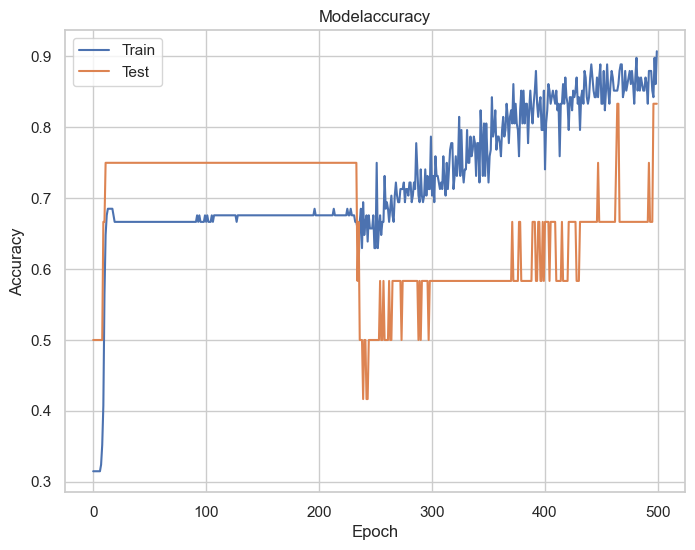

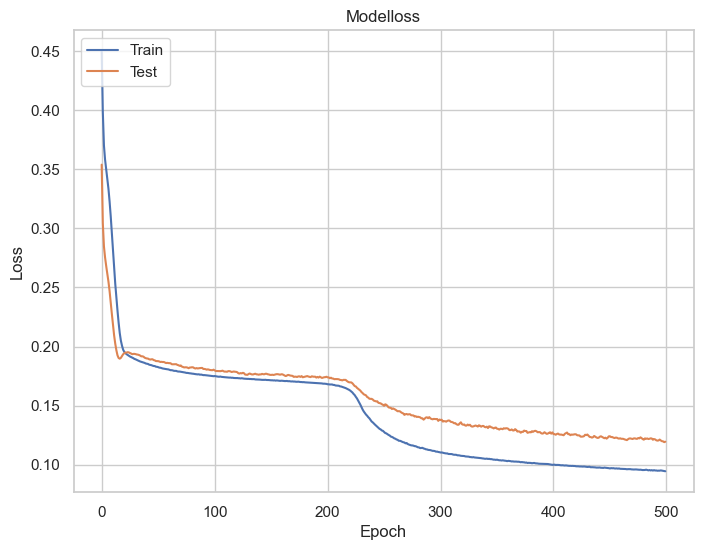

In [10]:
# Plot training & validation accuracy values
for idx, metric in enumerate(['accuracy', 'loss']):
    plt.figure(idx) #generates distinct plots
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model' + metric)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

Note: it may take several hundreds of epochs to actually reach full convergence. Give it a try if you have the time. I will show an example in the solution.

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** This exercise should already blur the line between "classification" and "regression". Go all the way and learn to predict the value of one of the four continuous features of the Iris dataset based on the other three.

#### BONUS **[ZERO pt]** A classic example is the XOR problem: write a neural network that maps two binary inputs to one binary output, and learn the 2D [XOR](https://en.wikipedia.org/wiki/Exclusive_or) logical operation. If you draw the four points, you will see they are not linearly separable. However you can write a neural network with one hidden layer of two neurons that solves the problem. Initialize the network with random weights, then execute the backpropagation algorithm by hand on paper until you solve it. This is a great exercise if you're stuck with the implementation of backprop and you cannot figure out what went wrong, as it forces you to get the dimensions right. Using 3 hidden neurons is a bit simpler and should require less iterations.

### Final considerations

- The most important take-home message here is to distinguish between the _model_ and the _learning_. You will find most people use "neural network" to refer to both together, which limits the understanding of either part in isolation and therefore each part's limitations and applicability. Be flexible.